In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

<p> Exercise 1: Test scores </p>
<p?>
Create a series of 10 elements, random integers from 70 to 100, representing scores on a monthly exam. Set the index to be the month names, starting in September and ending in June.
</p>

With this series, write code to answer the following questions:
<p>
What is the student’s average test score for the entire year?
</p>

<p>
What is the student’s average test score during the first half of the year (i.e., the first five months)?
</p>

<p>
What is the student’s average test score during the second half of the year?
</p>


<p> Did the student improve their performance in the second half? If so, by how much? </p>

In [2]:
g = np.random.default_rng(0)
s = Series(g.integers(70, 101, 10))


In [3]:
s.index = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()

In [4]:
s

Sep    96
Oct    89
Nov    85
Dec    78
Jan    79
Feb    71
Mar    72
Apr    70
May    75
Jun    95
dtype: int64

In [5]:
s.mean()

81.0

In [ ]:
# student average score over the year = 81   

In [7]:
# student average score over the first halft of the school year 
s.iloc[0:5].mean()

85.4

In [10]:
# the first half of the full school year, the student has an average grade of 85.4 which is higher than the average of the full year by 5.4%  
((s.iloc[0:5].mean() / s.mean()) - 1) * 100

5.432098765432114

In [15]:
first_half =s.iloc[0:5]

In [14]:
# student average score over the second half of the school year 
second_half = s.iloc[-5:]

In [16]:
second_half.mean()

76.6

In [ ]:
# the average score of the student is lower in the second half of the school year which drive the performance of the full school year to be lower than the first half of the school year.  
# 2nd half year, the average grade is only 90% of the first half. which the student went from 85.4 to 76.6 

In [20]:
1 - (second_half.mean() / first_half.mean() )

0.10304449648711955

Beyond the exercise

In [ ]:
# In which month did this student get their highest score? 

In [21]:
# solution 1: search for the index name using .index, then search for the highest value of the list of the index
s.index.max() 


96

In [25]:
# solution 2: use the build in method 
s.idxmax()

'Sep'

In [32]:
# solution 3: sorting the value of all the index, list from highest to lowest. the result is the first row
s.sort_values(ascending=False)

Sep    96
Jun    95
Oct    89
Nov    85
Jan    79
Dec    78
May    75
Mar    72
Feb    71
Apr    70
dtype: int64

In [ ]:
# What were this student’s five highest scores?

In [37]:
five_highest_grade = s.sort_values(ascending=False)[0:5]

In [38]:
five_highest_grade

Sep    96
Jun    95
Oct    89
Nov    85
Jan    79
dtype: int64

In [49]:
# found the round(-1) solution from stackoverflow, seems like the fastest solution 
grade_round = s.round(-1)
grade_round

Sep    100
Oct     90
Nov     80
Dec     80
Jan     80
Feb     70
Mar     70
Apr     70
May     80
Jun    100
dtype: int64

Exercise 2: 

generate 10 test scores between 40 and 60, again using an index starting with September and ending with June. Find the mean of the scores and add the difference between the mean and 80 to each of the scores.

In [51]:
g2 = np.random.default_rng(0)
months = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()

s2 = Series(g2.integers(40, 60, 10),
          index=months)

s2

Sep    57
Oct    52
Nov    50
Dec    45
Jan    46
Feb    40
Mar    41
Apr    40
May    43
Jun    56
dtype: int64

In [54]:
s2.mean() 

47.0

In [55]:
80 - s2.mean()

33.0

In [ ]:
# how to plot the scores. the mean, then the different?  !!!!

In [53]:
s2 + (80 - s2.mean())

Sep    90.0
Oct    85.0
Nov    83.0
Dec    78.0
Jan    79.0
Feb    73.0
Mar    74.0
Apr    73.0
May    76.0
Jun    89.0
dtype: float64

In [ ]:
# There’s at least one other way to scale test scores: by looking at both the mean of the scores and their standard deviation. Anyone who scored within one standard deviation of the mean got a C (below the mean) or a B (above the mean). Anyone who scored more than one standard deviation above the mean got an A, and anyone who got more than one standard deviation below the mean got a D. During which months did our student get an A, B, C, and D?


In [56]:
s2.std()

6.411794687223781

In [89]:
s2.median()

45.5

<Axes: >

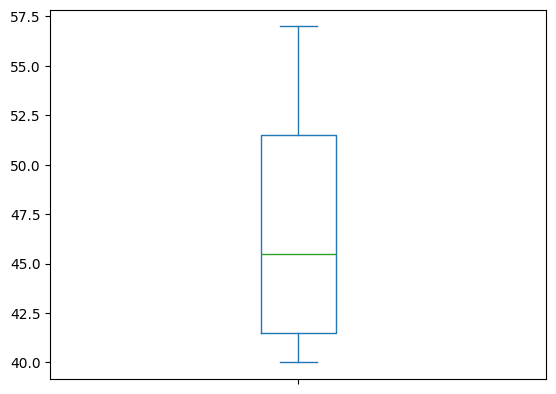

In [90]:
s2.plot.box()

In [57]:
s2.describe()

count    10.000000
mean     47.000000
std       6.411795
min      40.000000
25%      41.500000
50%      45.500000
75%      51.500000
max      57.000000
dtype: float64

In [72]:
s2.mean() - s2.std()

40.58820531277622

In [69]:
d_grade = s2[s2 < (s2.mean() - s2.std())]
d_grade

Feb    40
Apr    40
dtype: int64

In [68]:
a_grade = s2[s2 > (s2.mean() + s2.std())]
a_grade

Sep    57
Jun    56
dtype: int64

In [75]:
mean_value = s2.mean()  # Store mean value to avoid recalculating
std_value = s2.std()    # Store standard deviation for reuse

b_grade = s2[(s2 > mean_value) & (s2 < (mean_value + std_value))]
b_grade

Oct    52
Nov    50
dtype: int64

In [76]:
c_grade = s2[(s2 < mean_value) & (s2 > (mean_value - std_value))]
c_grade

Dec    45
Jan    46
Mar    41
May    43
dtype: int64

In [78]:
d_grade

Feb    40
Apr    40
dtype: int64

In [79]:
c_grade

Dec    45
Jan    46
Mar    41
May    43
dtype: int64

In [80]:
b_grade

Oct    52
Nov    50
dtype: int64

In [82]:
a_grade

Sep    57
Jun    56
dtype: int64

In [88]:
less_than_2std = s2[s2 < (mean_value - (std_value * 2))]
less_than_2std

Series([], dtype: int64)